In [2]:
# CPU vs GPU - Explorartory Data Analysis for Semiconductor Trends
# This project analyzes a dataset of 2,185 CPUs and 2,668 GPUs to understand trends in semiconductor development.
# It includes Moore's Law, Dennard Scaling, and GPU performance doubling every 1.5 years. 
# It aids researchers, designers, and industry in predicting future performance improvements and optimizing hardware and software solutions.

# Downloading the necessary modules and libraries for smooth functioning 
%pip install seaborn
#Simplifies data visualization for statistical data with built-in themes and color palettes.
%pip install plotly
#An interactive graphing library that supports multiple chart types, including 3D plots
%pip install statsmodels
#A Python library designed for estimating and testing statistical models. It includes functions for linear and generalized linear models
%pip install nbformat
#Nbformat is part of the Jupyter ecosystem and is used to manipulate notebook files in .ipynb format programmatically

In [9]:
# DATA INITILIASATION & LOADING 

import re #The re library provides regular expression operations to search, match, and manipulate text patterns
import numpy as np #numpy is a fundamental package for numerical computation, enabling efficient handling of arrays and matrices and performing mathematical operations on large datasets
import pandas as pd #pandas is essential for data manipulation and analysis, providing structures like DataFrames and Series to organize, filter, aggregate, and transform datasets easily
import matplotlib as mpl #matplotlib is a versatile plotting library used for creating static, interactive, and animated visualizations in Python
import matplotlib.pyplot as plt #matplotlib.pyplot is a submodule that provides a MATLAB-like interface, making it easier to create basic charts and figures with functions for labeling
import seaborn as sns #seaborn builds on matplotlib to simplify the creation of visually appealing statistical plots, offering tools for visualizing complex relationships and trends in data through various built-in themes
import plotly.express as px #plotly.express is part of Plotly, providing a high-level interface for quickly creating interactive visualizations such as scatter plots, bar charts, and 3D plots, 
import warnings 

warnings.simplefilter(action="ignore", category=np.VisibleDeprecationWarning)
warnings.simplefilter(action="ignore", category= UserWarning)
#warnings.simplefilter(action="ignore", category= pd.core.common.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline
#This is a magic command in Jupyter notebooks that ensures all matplotlib plots are displayed directly within the notebook output cells rather than in separate windows.
plt.style.use('ggplot')

plt.rcParams['axes.titleweight']   = 'bold'
plt.rcParams['axes.titlelocation'] = 'left'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['legend.framealpha'] = 0.5
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#DDDDFF'
plt.rcParams['scatter.edgecolors'] = '#DDDDFF'

pd.options.display.max_columns = 200
df = pd.read_csv("chip_dataset.csv", index_col=0)
df.info()
#Loading and Quick Look at the data
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4854 non-null   object 
 1   Type                   4854 non-null   object 
 2   Release Date           4854 non-null   object 
 3   Process Size (nm)      4845 non-null   float64
 4   TDP (W)                4228 non-null   float64
 5   Die Size (mm^2)        4139 non-null   float64
 6   Transistors (million)  4143 non-null   float64
 7   Freq (MHz)             4854 non-null   float64
 8   Foundry                4854 non-null   object 
 9   Vendor                 4854 non-null   object 
 10  FP16 GFLOPS            536 non-null    float64
 11  FP32 GFLOPS            1948 non-null   float64
 12  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), object(5)
memory usage: 436.1+ KB


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [4]:
df.describe()
# Short Summary of our data

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,536.000000,1948.000000,1306.000000
mean,55.109598,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
std,44.998676,76.807808,126.189383,4044.891098,1066.701523,13799.551131,3898.431487,1145.931856
min,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,22.000000,33.000000,104.000000,154.000000,590.000000,768.800000,257.300000,38.295000
50%,40.000000,65.000000,148.000000,624.000000,1073.500000,2965.500000,696.000000,89.280000
75%,90.000000,100.000000,239.000000,1550.000000,2400.000000,10600.000000,2116.750000,220.000000
max,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000


In [5]:
# DATA PREPROCESSING & CLEANING
# Number of missing values for each columns
df.isna().sum()
#We can notice a lot Nan values in the last 3 columns, 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'

Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

In [7]:
#Filling up 2000+ entries through mean or mode values can made the overall data biased or shifted towards a region. It's better to delete these columns.
df.drop(['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'], axis=1, inplace=True)
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD


In [12]:
df = df.rename(columns={
    'Product': 'model',
    'Release Date': 'release_date',
    'TDP (W)': 'tdp_w',
    'Die Size (mm^2)': 'die_size_mm2',
    'Process Size (nm)': 'process_size_nm',
    'Transistors (million)': 'transistors_10e6',
    'Freq (MHz)': 'freq_mhz',
    'Vendor': 'Vendor',
    'Foundry': 'Foundry'
})
# Rename Columns to understand the data better
df.head()

,model,Type,release_date,process_size_nm,tdp_w,die_size_mm2,transistors_10e6,freq_mhz,Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [13]:
# set release_date to datetime64, since it is being treated like an object
df.release_date = pd.to_datetime(df.release_date,format="%Y-%m-%d")
df = df.dropna(subset=['release_date'])
df['rel_year'] = df.release_date.dt.year.astype(int, errors='raise')

# Fill NaN values with mean in the remanining columns
df.process_size_nm = df.process_size_nm.fillna(df.process_size_nm.dropna().mean())
df.die_size_mm2 = df.die_size_mm2.fillna(df.die_size_mm2.dropna().mean())
df.transistors_10e6 = df.transistors_10e6.fillna(df.transistors_10e6.dropna().mean())

# set procss size to integer type
df.process_size_nm = df.process_size_nm.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4779 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   model             4779 non-null   object        
 1   Type              4779 non-null   object        
 2   release_date      4779 non-null   datetime64[ns]
 3   process_size_nm   4779 non-null   int32         
 4   tdp_w             4162 non-null   float64       
 5   die_size_mm2      4779 non-null   float64       
 6   transistors_10e6  4779 non-null   float64       
 7   freq_mhz          4779 non-null   float64       
 8   Foundry           4779 non-null   object        
 9   Vendor            4779 non-null   object        
 10  FP16 GFLOPS       516 non-null    float64       
 11  FP32 GFLOPS       1898 non-null   float64       
 12  FP64 GFLOPS       1271 non-null   float64       
 13  rel_year          4779 non-null   int32         
dtypes: datetime64[ns](1), float64

In [14]:
# Convert to categorical
categories = {
    'Vendor': ['AMD','Intel','Other','NVIDIA','ATI'],
    'Type': ['CPU','GPU'],
}
for k,v in categories.items():
    df[k] = pd.Categorical(df[k],categories=v,ordered=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4779 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   model             4779 non-null   object        
 1   Type              4779 non-null   category      
 2   release_date      4779 non-null   datetime64[ns]
 3   process_size_nm   4779 non-null   int32         
 4   tdp_w             4162 non-null   float64       
 5   die_size_mm2      4779 non-null   float64       
 6   transistors_10e6  4779 non-null   float64       
 7   freq_mhz          4779 non-null   float64       
 8   Foundry           4779 non-null   object        
 9   Vendor            4779 non-null   category      
 10  FP16 GFLOPS       516 non-null    float64       
 11  FP32 GFLOPS       1898 non-null   float64       
 12  FP64 GFLOPS       1271 non-null   float64       
 13  rel_year          4779 non-null   int32         
dtypes: category(2), datetime64[ns

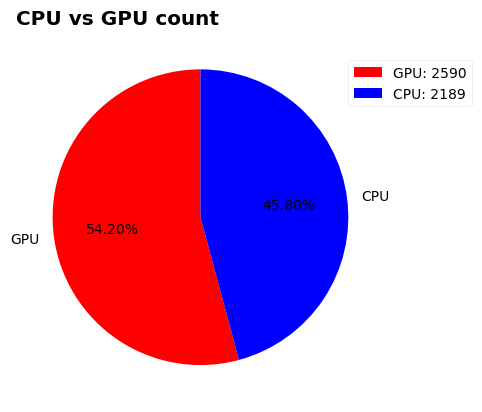

In [20]:
#Exploratory Analysis
# CPU & GPU Distribution percentages
type_counts = df['Type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%', startangle=90, colors=['red','blue'])
legend_labels = [f"{index}: {value}" for index, value in type_counts.items()]
plt.legend(labels=legend_labels, loc=(0.9, 0.8))
plt.title('CPU vs GPU count')
plt.show()

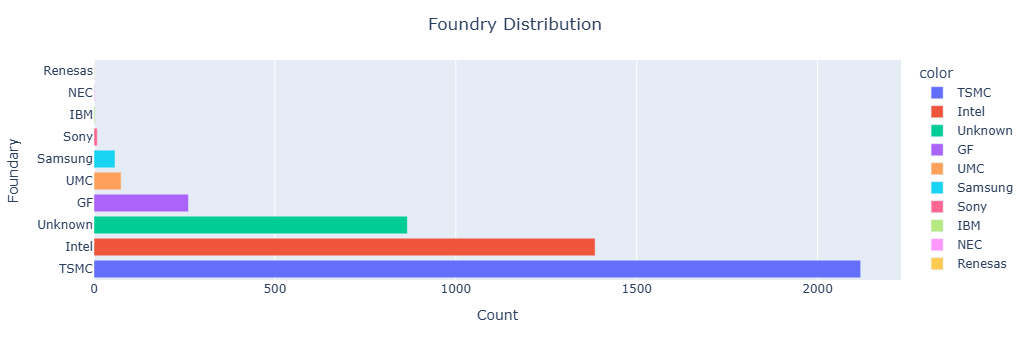

In [130]:
values = df.Foundry.value_counts()
names = values.index
fig = px.bar(y=names, x=values, color=names)
fig.update_layout({
    'title' : {
        'text': 'Foundry Distribution',
        'x':0.5
    }    
})
fig.update_xaxes(title_text="Count")
fig.update_yaxes(title_text="Foundary")
fig.show()

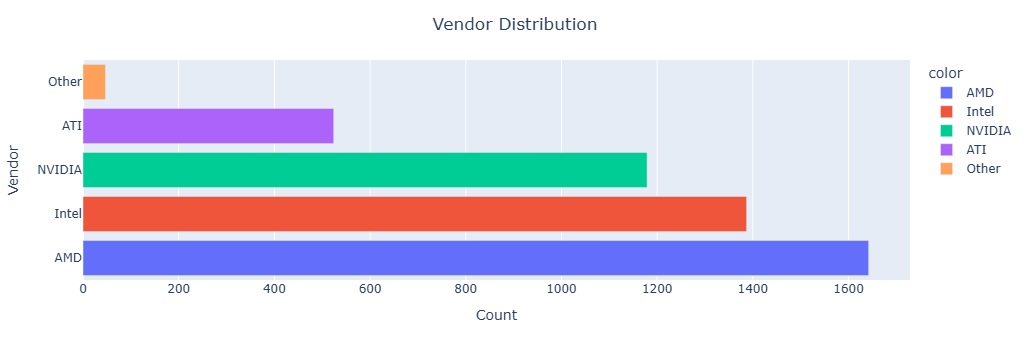

In [129]:
values = df.Vendor.value_counts()
names = values.index
fig = px.bar(y=names, x=values, color=names)
fig.update_layout({
    'title' : {
        'text': 'Vendor Distribution',
        'x':0.5,
    }
})
fig.update_xaxes(title_text="Count")
fig.update_yaxes(title_text="Vendor")
fig.show()

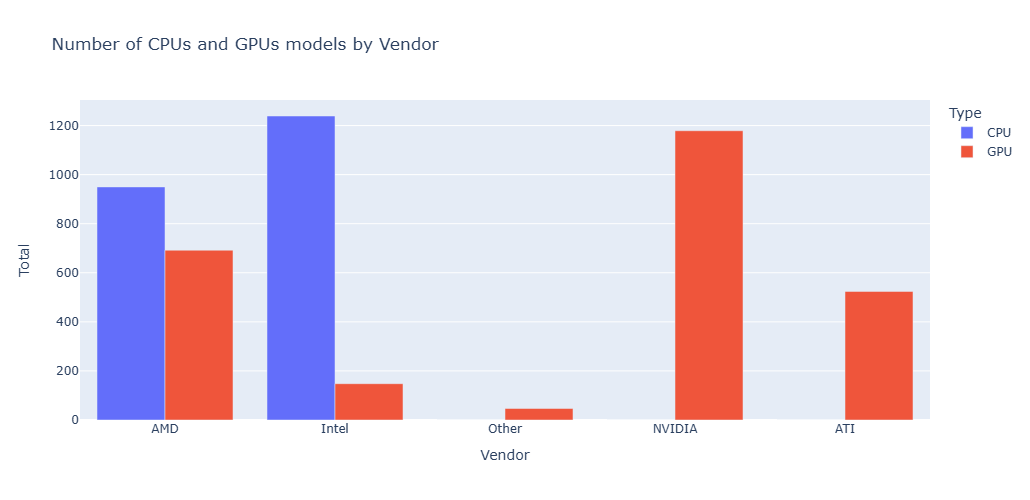

In [142]:
Vendors = df.groupby("Vendor")["Type"].value_counts().rename("Total").to_frame().reset_index()
fig = px.bar(data_frame= Vendors, x = "Vendor", y= "Total", color= "Type", barmode="group", title="Number of CPUs and GPUs models by Vendor",width=1020,height=500)
fig.show()

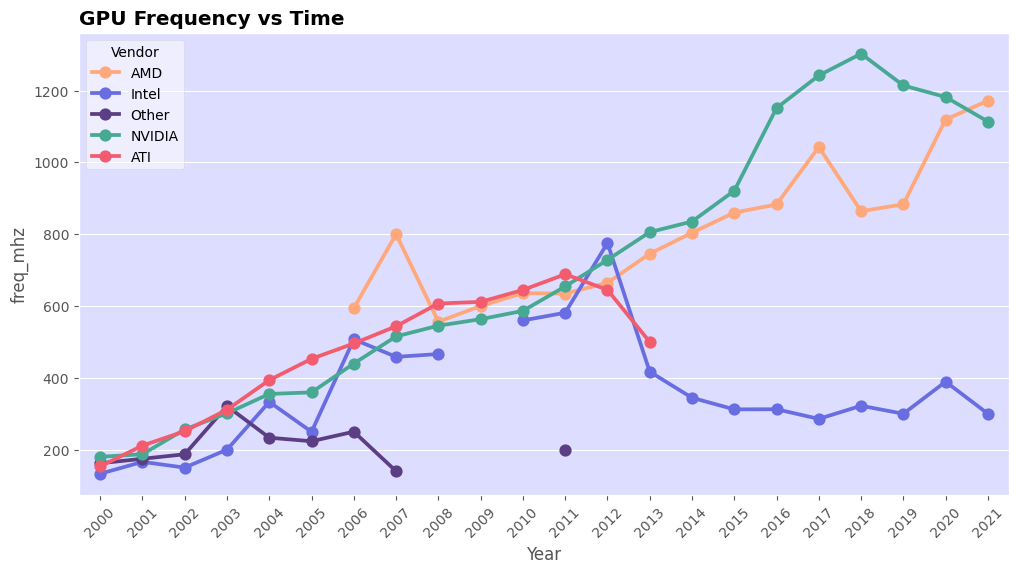

In [54]:
brand_colors = {'Intel': '#686EE2', 'AMD': '#FFA87B', 'ATI': '#F35C6E', 'Other': '#5C3E84', 'NVIDIA': '#47A992'}
type_colors = {'CPU': '#fc766a', 'GPU': '#5b84b1'}
df['Year'] = df['release_date'].dt.year.astype('Int64')
with_year = df.dropna(subset=['Year'])
cpu = with_year[with_year['Type'] == 'GPU']
plt.figure(figsize=(12,))
sns.pointplot(x='Year', y='freq_mhz', data=cpu, hue='Vendor', errorbar=None, palette=brand_colors)
plt.title('GPU Frequency vs Time')
plt.xticks(rotation=45);

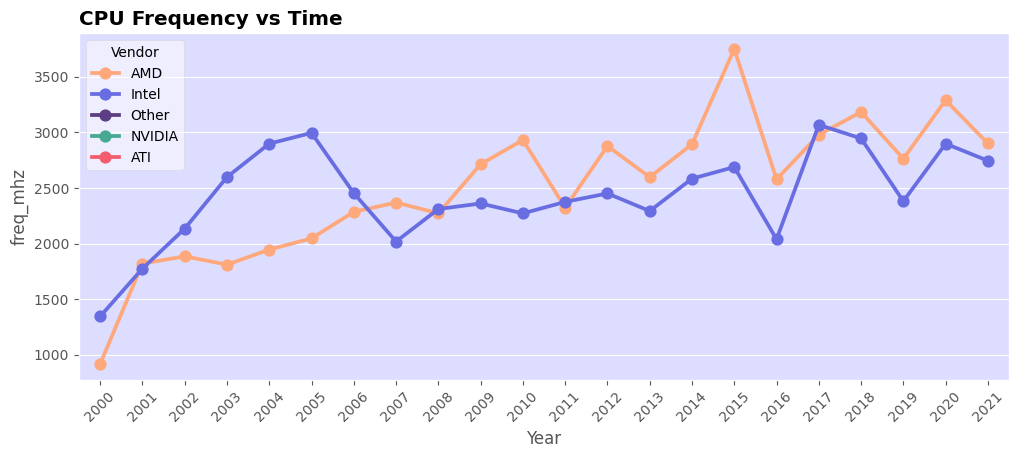

In [53]:
cpu=with_year[with_year['Type']=="CPU"]
plt.figure(figsize=(12,6))
sns.pointplot(x="Year",y="freq_mhz",data=cpu,hue="Vendor",errorbar=None,palette=brand_colors)
plt.title('CPU Frequency vs Time')
plt.xticks(rotation=45);

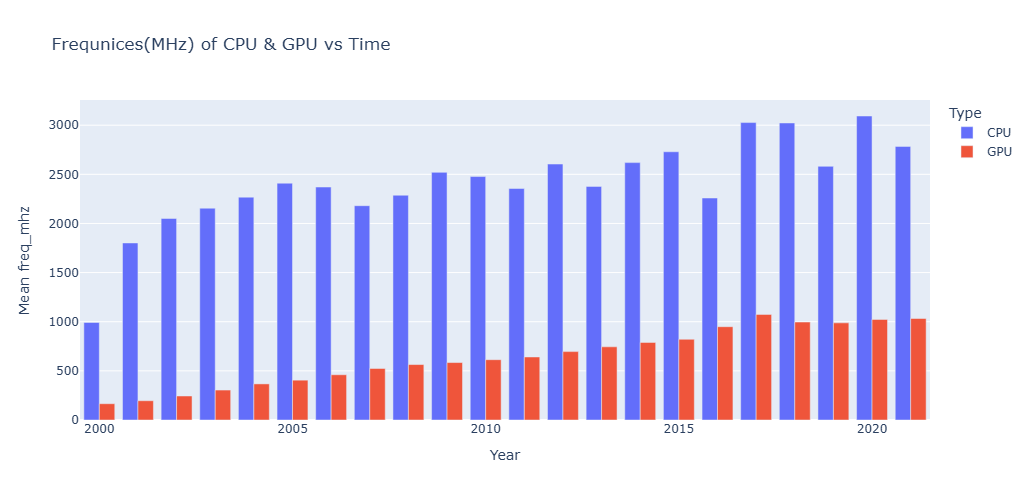

In [111]:
df_freq = df.groupby([df.Year, "Type"])["freq_mhz"].mean().rename("Mean freq_mhz").to_frame().reset_index()
fig = px.bar(data_frame=df_freq, x= "Year", y = "Mean freq_mhz", color= "Type", barmode="group", title= "Frequnices(MHz) of CPU & GPU vs Time",height=500,width=1050)
fig.show()
#We can clearly notice the rising trend of frequencies and that CPU Frequencies are significantly higher than GPU Frequenices

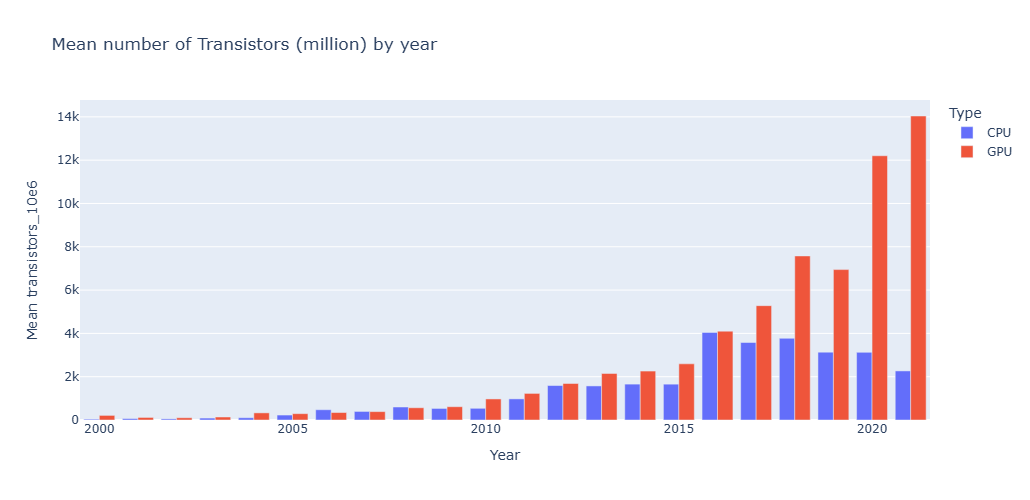

In [105]:
df_transistors = df.groupby([df.Year, "Type"])["transistors_10e6"].mean().rename("Mean transistors_10e6").to_frame().reset_index()
fig = px.bar(data_frame=df_transistors, x= "Year", y = "Mean transistors_10e6", color= "Type", barmode="group", title= "Mean number of Transistors (million) by year",height=500,width=1050)
fig.show()
#More Transistors are required for GPU Manufacturing as the years progress

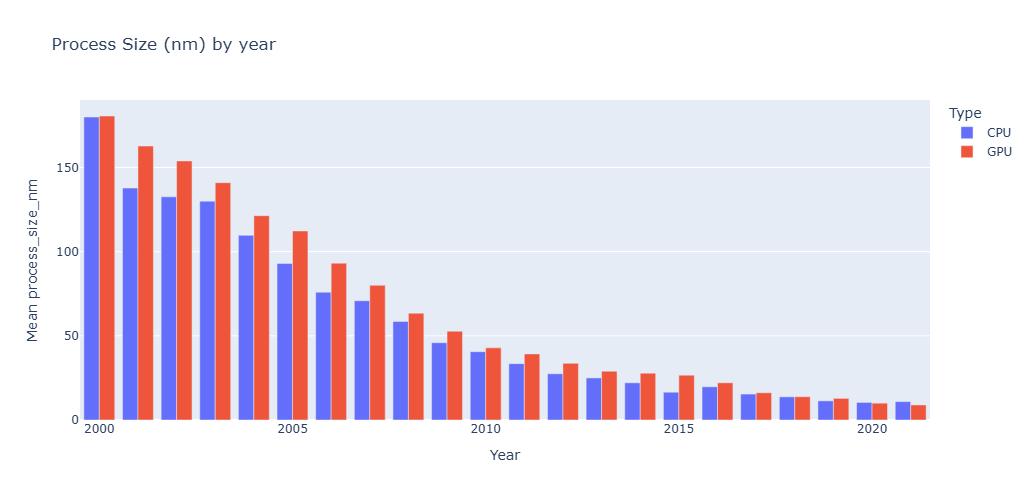

In [104]:
df_psize = df.groupby([df.Year, "Type"])["process_size_nm"].mean().rename("Mean process_size_nm").to_frame().reset_index()
fig = px.bar(data_frame=df_psize, y='Mean process_size_nm', x='Year', color='Type',barmode='group',title= "Process Size (nm) by year", height=500,width=1050)
fig.show()
#Process Size shows a negative correleation with time

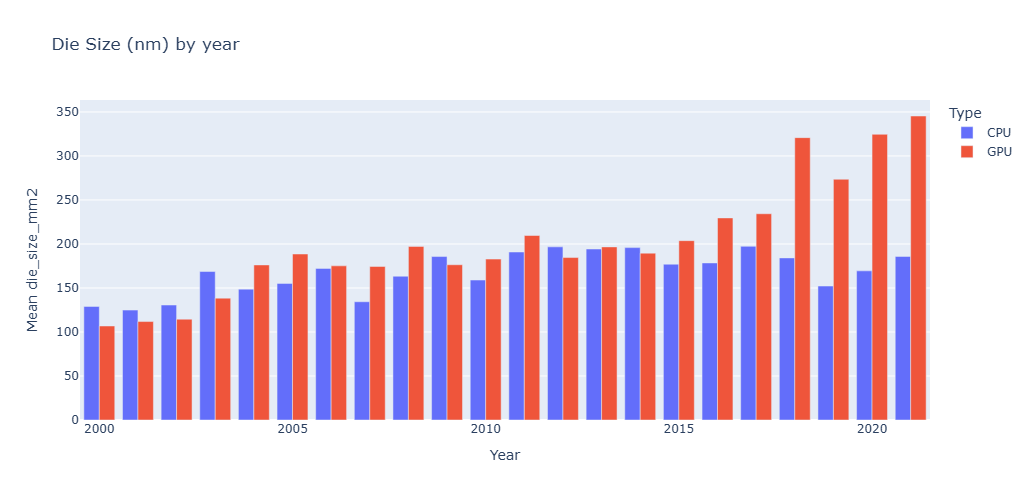

In [107]:
df_dsize = df.groupby([df.Year, "Type"])["die_size_mm2"].mean().rename("Mean die_size_mm2").to_frame().reset_index()
fig = px.bar(data_frame=df_dsize, y='Mean die_size_mm2', x='Year', color='Type',barmode='group',title= "Die Size (nm) by year", height=500,width=1050)
fig.show()
#GPU Die size has risen considerably in the past few years

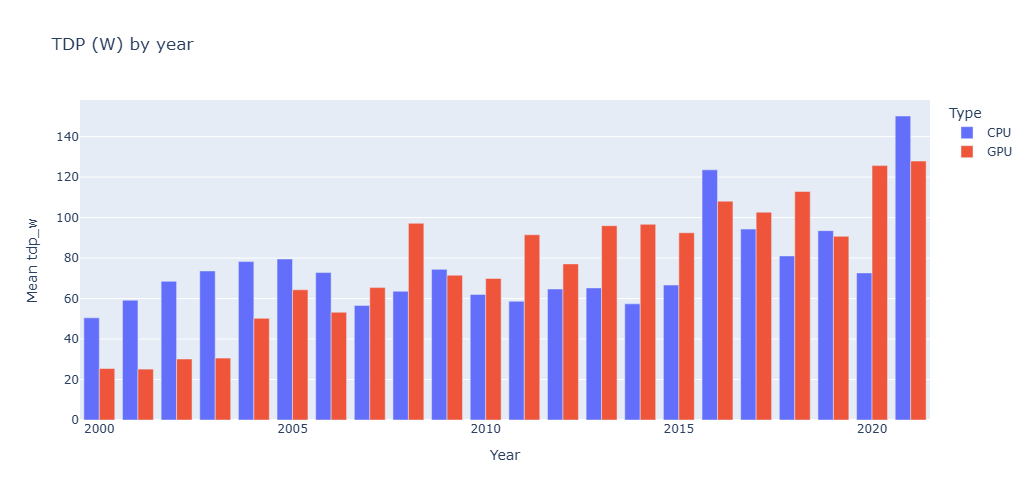

In [165]:
df_tdp = df.groupby([df.Year, "Type"])["tdp_w"].mean().rename("Mean tdp_w").to_frame().reset_index()
fig = px.bar(data_frame=df_tdp, y='Mean tdp_w', x='Year', color='Type',barmode='group',title= "TDP (W) by year", height=500,width=1050)
fig.show()
#Shows Positive Correleation with time

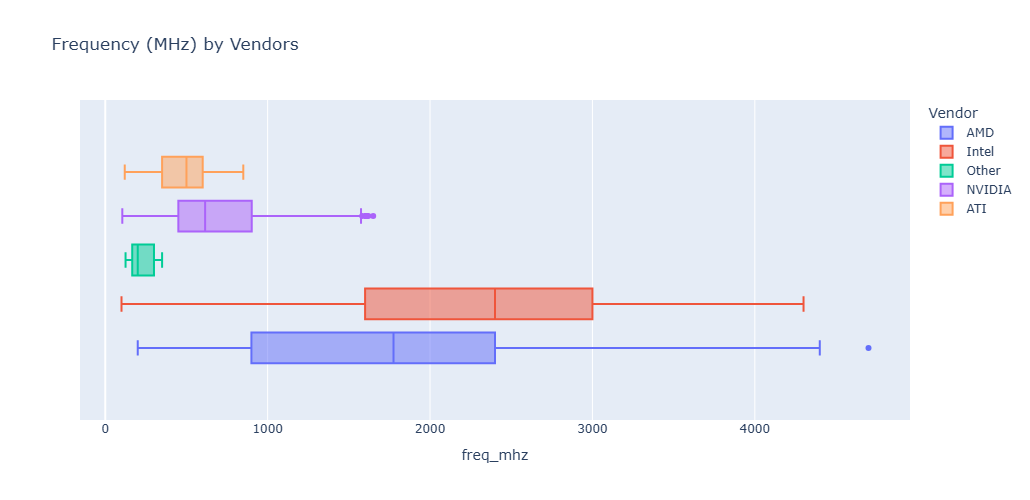

In [154]:
fig = px.box(data_frame=df, x='freq_mhz', color="Vendor",width=900,height=500,title="Frequency (MHz) by Vendors")
fig.show()
#This confirms our previous interpretation of frequency with respect to vendors.
#AMD and Intel have higher frequency than the rest.
#While overall Intel and AMD have almost similar frequency values, In 2005, the frequency values of Intel was much higher than the frequency values of AMD.

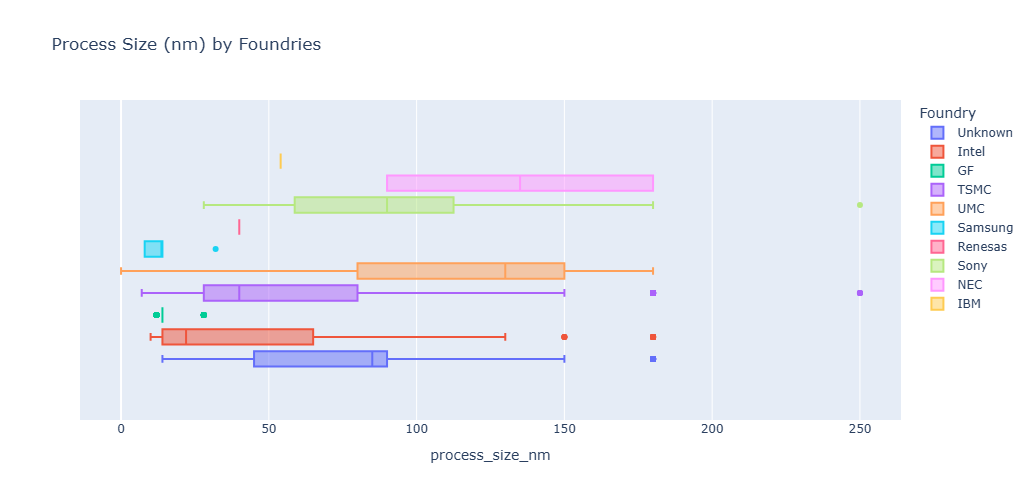

In [160]:
fig = px.box(data_frame=df, x='process_size_nm', color="Foundry", height=500,width=900,title="Process Size (nm) by Foundries")
fig.show()

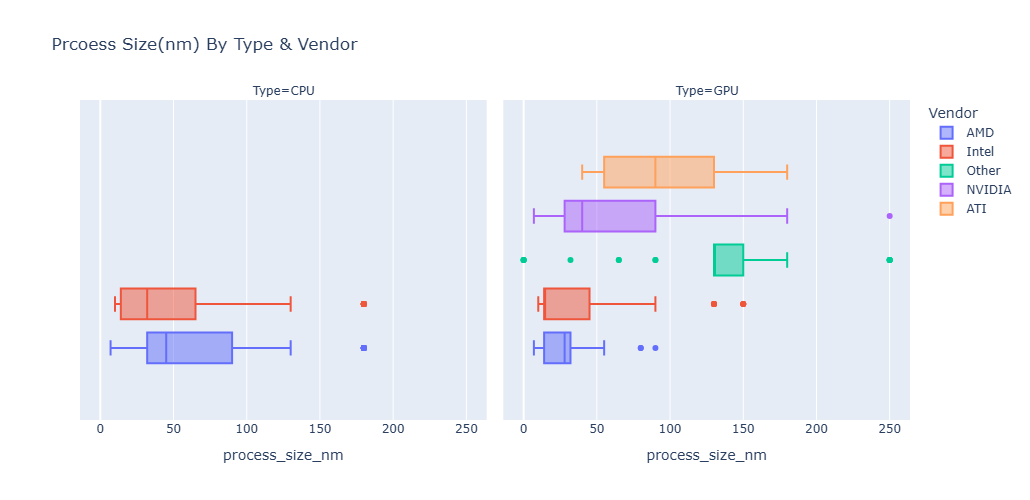

In [162]:
fig = px.box(data_frame=df, x='process_size_nm', facet_col="Type", color="Vendor",width=900,height=500,title="Prcoess Size(nm) By Type & Vendor")
fig.show()
#We have already seen that the average process size for a GPU has higher value than the CPU. The above graph confirms this
#We can clearly notice is that the Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors.
#We can see that Intel and AMD are the only vendors that have both GPU and CPU.
#Intel have a lower band than AMD for CPU.
#Even in the GPU section, Intel and AMD are the only vendors whose band lies in the lower range of process size.
#GF have very recently emerged in the market and In the past few years, it has scaled up its Frequency Values close to the level of Intel And TSMC.
#Although TSMC was present for many years, its frequency values have very recently increased.
#Intel seems to be very consistent with its frequency values, and it produce CPUs and GPUs with all range of frequency values.

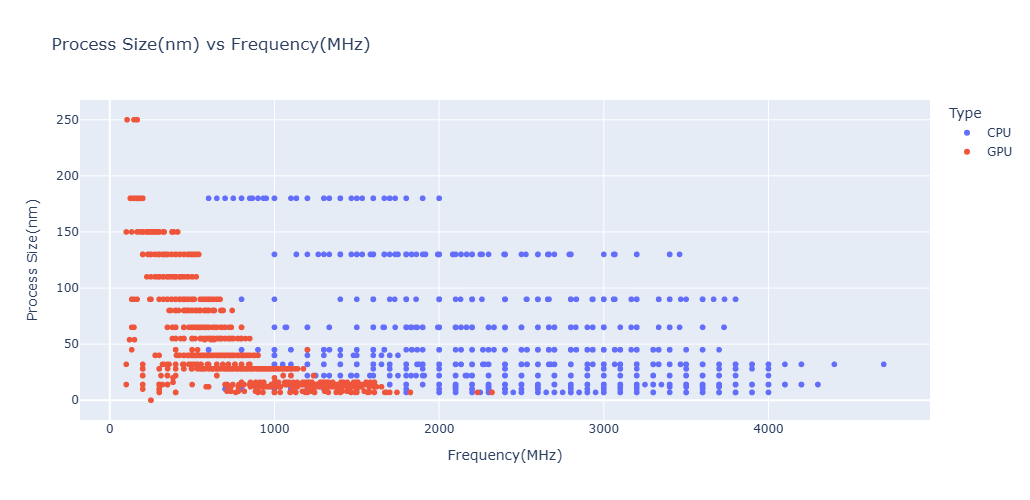

In [169]:
fig = px.scatter(data_frame=df, y='process_size_nm', x='freq_mhz', color="Type", width=1050,height=500,title="Process Size(nm) vs Frequency(MHz)")
fig.update_xaxes(title_text="Frequency(MHz)")
fig.update_yaxes(title_text="Process Size(nm)")
fig.show()

In [ ]:
fig = px.scatter(data_frame=df, x='die_size_mm2', y='transistors_10e6', color="Type", width=1050,height=500,title="Die Size(mm2) vs Transistors(Millions)",trendline='ols')
fig.update_yaxes(title_text="Transistors(Millions)")
fig.update_xaxes(title_text="Die Size(mm2) ")
fig.show()

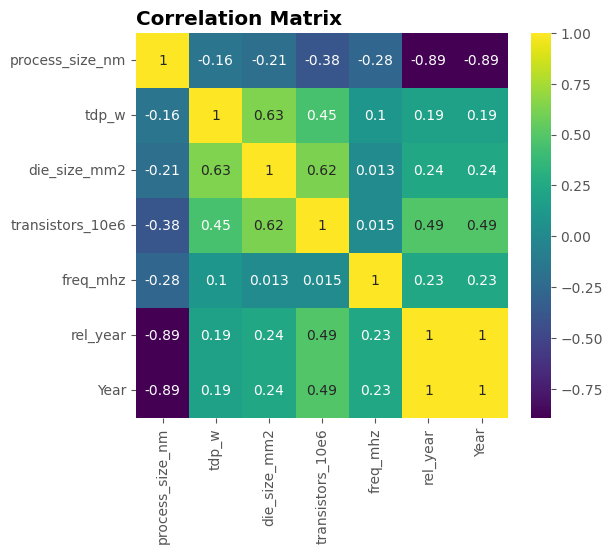

In [140]:
#df.drop(['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'], axis=1, inplace=True)
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

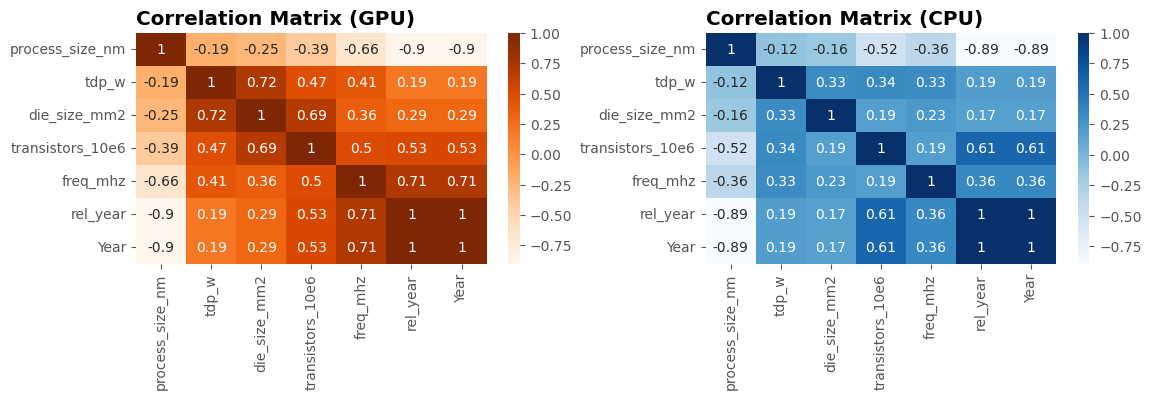

In [145]:
corr_cpu = df[df['Type']=='CPU'].corr(numeric_only=True)
corr_gpu = df[df['Type']=='GPU'].corr(numeric_only=True)

fig,ax = plt.subplots(1,2,figsize=(13,3),gridspec_kw={"wspace":0.3})

sns.heatmap(corr_gpu, annot=True, cmap='Oranges',ax=ax[0])
ax[0].set_title('Correlation Matrix (GPU)')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)

sns.heatmap(corr_cpu, annot=True, cmap='Blues',ax=ax[1])
ax[1].set_title('Correlation Matrix (CPU)')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
plt.show()

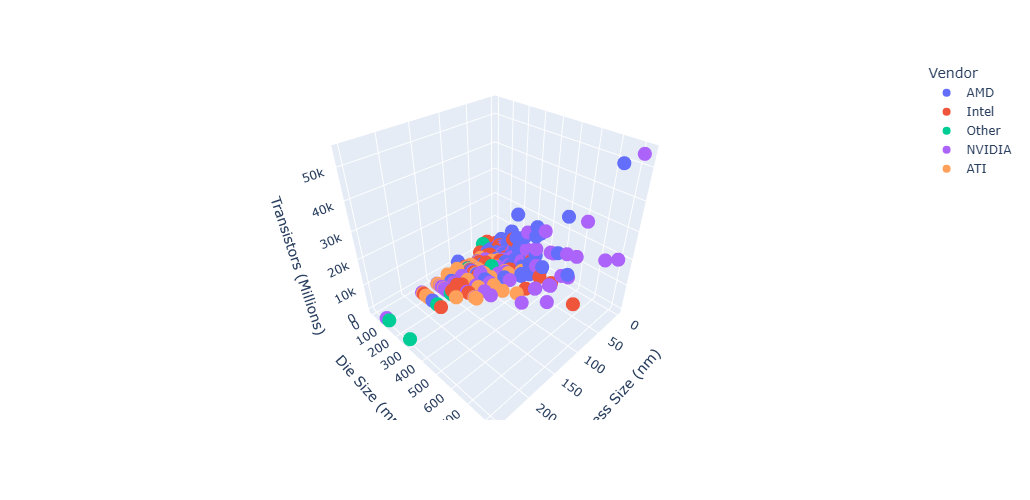

In [151]:
fig = px.scatter_3d(df, x='process_size_nm', y='die_size_mm2', z='transistors_10e6',
              color='Vendor', width=1020,height=500)
fig.update_layout(
    scene=dict(
        xaxis_title='Process Size (nm)',
        yaxis_title='Die Size (mm²)',
        zaxis_title='Transistors (Millions)'
    )
)
fig.show()